# Task: Covid-19 Data Analysis
### This notebook is used to understand the comprehension of Data Analysis techniques using Pandas library.

### Data Source: 
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_daily_reports

### File naming convention

MM-DD-YYYY.csv in UTC.

### Field description

- Province_State: China - province name; US/Canada/Australia/ - city name, state/province name; Others - name of the event (e.g., "Diamond Princess" cruise ship); other countries - blank.

- Country_Region: country/region name conforming to WHO (will be updated).

- Last_Update: MM/DD/YYYY HH:mm (24 hour format, in UTC).

- Confirmed: the number of confirmed cases. For Hubei Province: from Feb 13 (GMT +8), we report both clinically diagnosed and lab-confirmed cases. For lab-confirmed cases only (Before Feb 17), please refer to who_covid_19_situation_reports. For Italy, diagnosis standard might be changed since Feb 27 to "slow the growth of new case numbers." (Source)

- Deaths: the number of deaths.

- Recovered: the number of recovered cases.

### Question 1

#### Read the dataset

In [182]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/03-09-2021.csv')
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-03-10 05:24:35,33.93911,67.709953,55876,2451,49409.0,4016.0,Afghanistan,143.535529,4.386499
1,NaN,NaN,NaN,Albania,2021-03-10 05:24:35,41.15330,20.168300,114209,1969,76784.0,35456.0,Albania,3968.621864,1.724032
2,NaN,NaN,NaN,Algeria,2021-03-10 05:24:35,28.03390,1.659600,114543,3022,79319.0,32202.0,Algeria,261.209294,2.638311
3,NaN,NaN,NaN,Andorra,2021-03-10 05:24:35,42.50630,1.521800,11089,112,10685.0,292.0,Andorra,14351.905779,1.010010
4,NaN,NaN,NaN,Angola,2021-03-10 05:24:35,-11.20270,17.873900,21114,516,19677.0,921.0,Angola,64.242159,2.443876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4009,NaN,NaN,Unknown,Ukraine,2021-03-10 05:24:35,NaN,NaN,0,0,0.0,0.0,"Unknown, Ukraine",0.000000,0.000000
4010,NaN,NaN,NaN,Nauru,2021-03-10 05:24:35,-0.52280,166.931500,0,0,0.0,0.0,Nauru,0.000000,0.000000
4011,NaN,NaN,Niue,New Zealand,2021-03-10 05:24:35,-19.05440,-169.867200,0,0,0.0,0.0,"Niue, New Zealand",0.000000,0.000000
4012,NaN,NaN,NaN,Tuvalu,2021-03-10 05:24:35,-7.10950,177.649300,0,0,0.0,0.0,Tuvalu,0.000000,0.000000


#### Display the top 5 rows in the data

In [183]:
df.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-03-10 05:24:35,33.93911,67.709953,55876,2451,49409.0,4016.0,Afghanistan,143.535529,4.386499
1,NaN,NaN,NaN,Albania,2021-03-10 05:24:35,41.15330,20.168300,114209,1969,76784.0,35456.0,Albania,3968.621864,1.724032
2,NaN,NaN,NaN,Algeria,2021-03-10 05:24:35,28.03390,1.659600,114543,3022,79319.0,32202.0,Algeria,261.209294,2.638311
3,NaN,NaN,NaN,Andorra,2021-03-10 05:24:35,42.50630,1.521800,11089,112,10685.0,292.0,Andorra,14351.905779,1.010010
4,NaN,NaN,NaN,Angola,2021-03-10 05:24:35,-11.20270,17.873900,21114,516,19677.0,921.0,Angola,64.242159,2.443876


#### Show the information of the dataset

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4014 entries, 0 to 4013
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3266 non-null   float64
 1   Admin2               3271 non-null   object 
 2   Province_State       3835 non-null   object 
 3   Country_Region       4014 non-null   object 
 4   Last_Update          4014 non-null   object 
 5   Lat                  3924 non-null   float64
 6   Long_                3924 non-null   float64
 7   Confirmed            4014 non-null   int64  
 8   Deaths               4014 non-null   int64  
 9   Recovered            739 non-null    float64
 10  Active               739 non-null    float64
 11  Combined_Key         4014 non-null   object 
 12  Incident_Rate        3924 non-null   float64
 13  Case_Fatality_Ratio  3968 non-null   float64
dtypes: float64(7), int64(2), object(5)
memory usage: 439.2+ KB


#### Show the sum of missing values of features in the dataset

In [185]:
df.isnull().sum()

FIPS                    748
Admin2                  743
Province_State          179
Country_Region            0
Last_Update               0
Lat                      90
Long_                    90
Confirmed                 0
Deaths                    0
Recovered              3275
Active                 3275
Combined_Key              0
Incident_Rate            90
Case_Fatality_Ratio      46
dtype: int64

### Question 2

#### Show the number of Confirmed cases by Country

In [186]:
Confirmed_cases = df.groupby('Country_Region')['Confirmed'].sum()
Confirmed_cases

Country_Region
Afghanistan              55876
Albania                 114209
Algeria                 114543
Andorra                  11089
Angola                   21114
                         ...  
West Bank and Gaza      200382
Winter Olympics 2022         0
Yemen                     2586
Zambia                   82897
Zimbabwe                 36321
Name: Confirmed, Length: 201, dtype: int64

#### Show the number of Deaths by Country

In [187]:
Deaths = df.groupby('Country_Region')['Deaths'].sum()
Deaths

Country_Region
Afghanistan             2451
Albania                 1969
Algeria                 3022
Andorra                  112
Angola                   516
                        ... 
West Bank and Gaza      2170
Winter Olympics 2022       0
Yemen                    654
Zambia                  1137
Zimbabwe                1489
Name: Deaths, Length: 201, dtype: int64

#### Show the number of Recovered cases by Country

In [188]:
Recovered_cases = df.groupby('Country_Region')['Recovered'].sum()
Recovered_cases

Country_Region
Afghanistan              49409.0
Albania                  76784.0
Algeria                  79319.0
Andorra                  10685.0
Angola                   19677.0
                          ...   
West Bank and Gaza      178121.0
Winter Olympics 2022         0.0
Yemen                     1451.0
Zambia                   79162.0
Zimbabwe                 33919.0
Name: Recovered, Length: 201, dtype: float64

#### Show the number of Active Cases by Country

In [189]:
Active = df.groupby('Country_Region')['Active'].sum()
Active

Country_Region
Afghanistan              4016.0
Albania                 35456.0
Algeria                 32202.0
Andorra                   292.0
Angola                    921.0
                         ...   
West Bank and Gaza      20091.0
Winter Olympics 2022        0.0
Yemen                     481.0
Zambia                   2598.0
Zimbabwe                  913.0
Name: Active, Length: 201, dtype: float64

#### Show the latest number of Confirmed, Deaths, Recovered and Active cases Country-wise

In [190]:
df = pd.merge(Confirmed_cases,Deaths, on='Country_Region')
df = pd.merge(df,Recovered_cases, on='Country_Region')
df = pd.merge(df,Active, on='Country_Region')
Table = df
Table

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
Afghanistan,55876,2451,49409.0,4016.0
Albania,114209,1969,76784.0,35456.0
Algeria,114543,3022,79319.0,32202.0
Andorra,11089,112,10685.0,292.0
Angola,21114,516,19677.0,921.0
...,...,...,...,...
West Bank and Gaza,200382,2170,178121.0,20091.0
Winter Olympics 2022,0,0,0.0,0.0
Yemen,2586,654,1451.0,481.0


### Question 3

### Show the countries with no recovered cases

In [191]:
def filter_func(x):
    return x['Recovered'] == 0
No_recovered = df.groupby('Country_Region').filter(filter_func)
No_recovered['Recovered']

Country_Region
Antarctica              0.0
Belgium                 0.0
Kiribati                0.0
Korea, North            0.0
Nauru                   0.0
Palau                   0.0
Serbia                  0.0
Summer Olympics 2020    0.0
Sweden                  0.0
Tonga                   0.0
Tuvalu                  0.0
US                      0.0
Winter Olympics 2022    0.0
Name: Recovered, dtype: float64

#### Show the countries with no confirmed cases

In [192]:
def filter_func(x):
    return x['Confirmed'] == 0
No_confirmed = df.groupby('Country_Region').filter(filter_func)
No_confirmed['Confirmed']

Country_Region
Antarctica              0
Kiribati                0
Korea, North            0
Nauru                   0
Palau                   0
Summer Olympics 2020    0
Tonga                   0
Tuvalu                  0
Winter Olympics 2022    0
Name: Confirmed, dtype: int64

#### Show the countries with no deaths

In [193]:
def filter_func(x):
    return x['Deaths'] == 0
No_deaths = df.groupby('Country_Region').filter(filter_func)
No_deaths['Deaths']

Country_Region
Antarctica               0
Cambodia                 0
Dominica                 0
Holy See                 0
Kiribati                 0
Korea, North             0
Laos                     0
Marshall Islands         0
Micronesia               0
Nauru                    0
Palau                    0
Saint Kitts and Nevis    0
Samoa                    0
Solomon Islands          0
Summer Olympics 2020     0
Timor-Leste              0
Tonga                    0
Tuvalu                   0
Vanuatu                  0
Winter Olympics 2022     0
Name: Deaths, dtype: int64

In [194]:
def filter_func(x):
    return x['Active'] == 0
No_Active = df.groupby('Country_Region').filter(filter_func)
No_Active['Active']

Country_Region
Antarctica               0.0
Diamond Princess         0.0
Grenada                  0.0
Kiribati                 0.0
Korea, North             0.0
MS Zaandam               0.0
Marshall Islands         0.0
Micronesia               0.0
Nauru                    0.0
Palau                    0.0
Saint Kitts and Nevis    0.0
Summer Olympics 2020     0.0
Tonga                    0.0
Tuvalu                   0.0
Winter Olympics 2022     0.0
Name: Active, dtype: float64

### Question 4

#### Show the Top 10 countries with Confirmed cases

In [195]:
Table.nlargest(10, 'Confirmed')


,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,29278676,525818,0.0,509.0
India,11262707,158063,10920046.0,184598.0
Brazil,11136064,268759,9878566.0,975636.0
Russia,4293750,88315,3888071.0,317364.0
United Kingdom,4241855,150643,11868.0,4104959.0
France,3992853,89454,274331.0,3629068.0
Spain,3164982,71727,150376.0,2942879.0
Italy,3101093,100479,2521731.0,478883.0
Turkey,2807387,29160,2640669.0,137558.0


#### Show the Top 10 Countries with Active cases

In [196]:
Table.nlargest(10, 'Active')

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
United Kingdom,4241855,150643,11868.0,4104959.0
France,3992853,89454,274331.0,3629068.0
Spain,3164982,71727,150376.0,2942879.0
Mexico,2137884,191789,1681336.0,1946095.0
Peru,1380023,128615,1288067.0,1242870.0
Netherlands,1143481,16046,14786.0,1112649.0
Brazil,11136064,268759,9878566.0,975636.0
Belgium,791171,22327,0.0,776433.0
Sweden,695975,13042,0.0,682933.0


### Question 5

#### Plot Country-wise Total deaths, confirmed, recovered and active casaes where total deaths have exceeded 50,000

In [197]:
import matplotlib.pyplot as plt

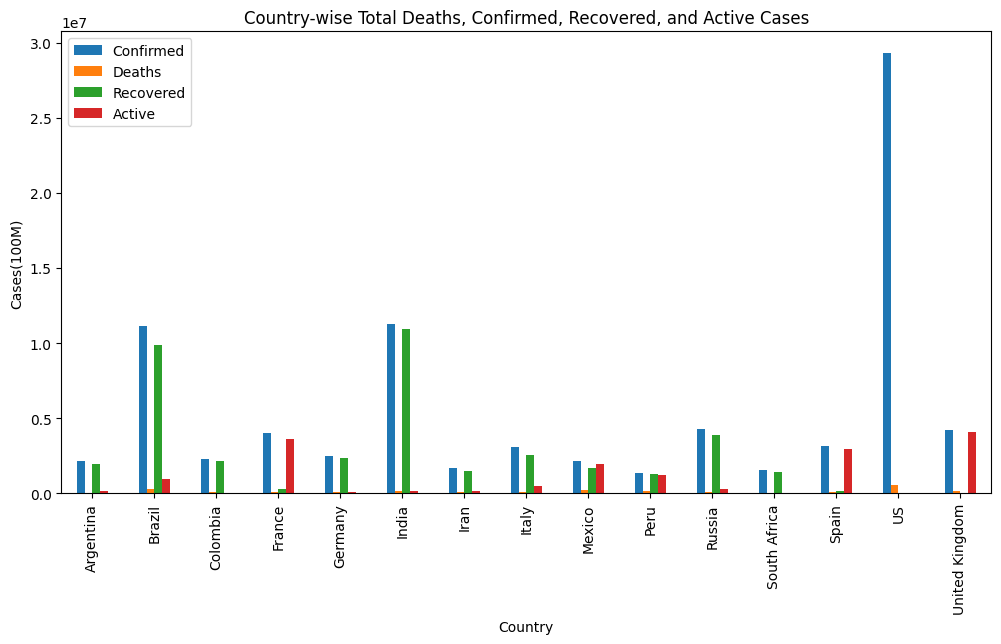

In [198]:
Filted_table = Table[Table['Deaths']>50000]
plot_data = Filted_table[['Confirmed', 'Deaths', 'Recovered', 'Active']]
plot_data.plot(kind='bar', figsize=(12, 6))
plt.title('Country-wise Total Deaths, Confirmed, Recovered, and Active Cases')
plt.xlabel('Country')
plt.ylabel('Cases(100M)')
plt.show()

### Question 6

### Plot Province/State wise Deaths in USA

In [199]:
import plotly.express as px

In [200]:
covid_data= pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/09-11-2020.csv')

In [201]:
covid_data.columns

Index(['FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Last_Update',
       'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Combined_Key', 'Incidence_Rate', 'Case-Fatality_Ratio'],
      dtype='object')

In [202]:
Filted_table = covid_data[covid_data['Country_Region']=='US']
Filted_table = Filted_table.groupby('Province_State')['Deaths'].sum()
fig = px.bar(Filted_table, y='Deaths', title='Province/State-wise Deaths in the US')
fig.show()

### Question 7

### Plot Province/State Wise Active Cases in USA

In [203]:
Filted_table = covid_data[covid_data['Country_Region']=='US']
Filted_table = Filted_table.groupby('Province_State')['Active'].sum()
fig = px.bar(Filted_table, y='Active', title='Province/State-wise Active Cases in the US')
fig.show()

### Question 8

### Plot Province/State Wise Confirmed cases in USA

In [204]:
Filted_table = covid_data[covid_data['Country_Region']=='US']
Filted_table = Filted_table.groupby('Province_State')['Confirmed'].sum()
fig = px.bar(Filted_table, y='Confirmed', title='Province/State-wise Confirmed Cases in the US')
fig.show()

### Question 9

### Plot Worldwide Confirmed Cases over time

In [205]:
import plotly.express as px
import plotly.io as pio

In [206]:
covid_data = covid_data.groupby('Last_Update')['Confirmed'].sum()
covid_data

Last_Update
2020-08-04 02:27:56         152
2020-08-07 22:34:20           0
2020-09-12 04:25:05    28556111
2021-04-02 15:13:53         122
Name: Confirmed, dtype: int64

In [207]:
fig = px.line(covid_data, y='Confirmed', title='Worldwide Confirmed Cases over Time Updated in 31/12/2020')
fig.show()